#### Task - 02 UNEMPLOYMENT ANALYSIS WITH PYTHON
By Damayanti Sarkar - OIBSIP JUNE P2

In [37]:
#Importing the required packages and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [38]:
# Load the dataset
data = pd.read_csv("Unemployment in India.csv")

In [39]:
# Display the columns in the dataset
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [40]:
# Display the first few rows of the dataset
print("\nSample data from the dataset:")
print(data.head(5))


Sample data from the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)   
0  Andhra Pradesh   31-05-2019    Monthly                              3.65  \
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [41]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [42]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isna().sum())


Missing values in the dataset:
Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64


In [43]:
# Remove rows with missing values
data.dropna(inplace=True)

In [44]:
# Extract the 'Estimated Employed' and 'Estimated Unemployment Rate (%)' columns
employed = data[' Estimated Employed'].iloc[:50]
unemployed = data[' Estimated Unemployment Rate (%)'].iloc[:50]

In [45]:
# Flatten the Series to an array
employed_array = employed.values.flatten()
unemployed_array = unemployed.values.flatten()

In [46]:
# Normalize the values
employed_normalized = normalize([employed_array])
unemployed_normalized = normalize([unemployed_array])

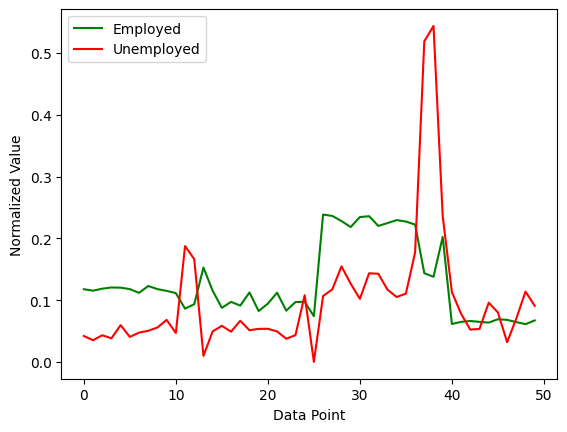

In [47]:
# Plot the normalized values
plt.plot(employed_normalized[0], color='green', label='Employed')
plt.plot(unemployed_normalized[0], color='red', label='Unemployed')
plt.xlabel("Data Point")
plt.ylabel("Normalized Value")
plt.legend()
plt.show()

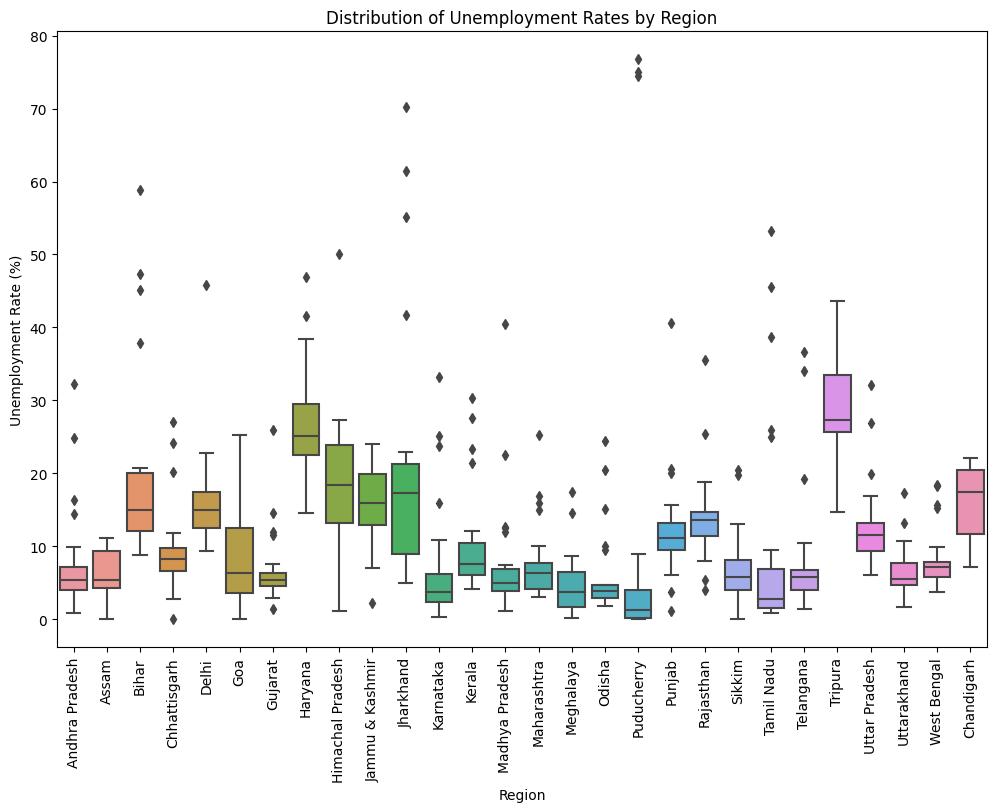

In [48]:
# Create a box plot of the unemployment rate by region
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Region', y=' Estimated Unemployment Rate (%)')
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.title("Distribution of Unemployment Rates by Region")
plt.xticks(rotation=90)
plt.show()

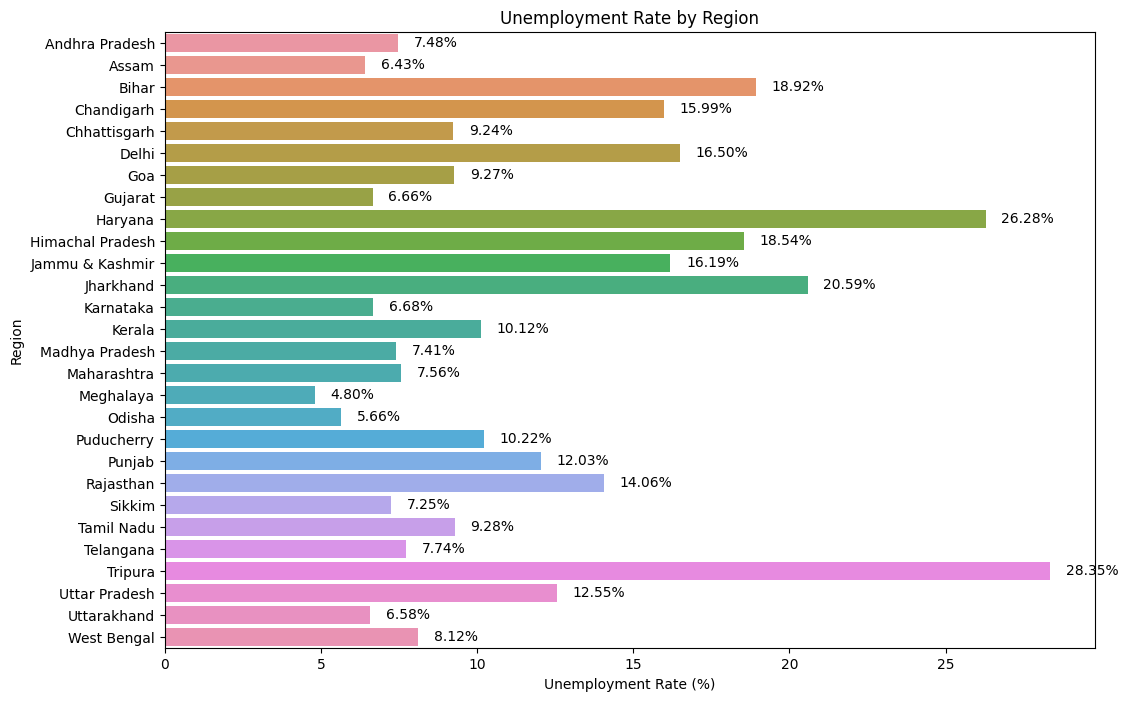

In [49]:
# Calculate the average unemployment rate for each region
unemployment_rate = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Calculate the percentage of each region
total_regions = unemployment_rate.shape[0]
unemployment_rate['Percentage'] = unemployment_rate[' Estimated Unemployment Rate (%)']

# Create a bar plot of the average unemployment rate by region
plt.figure(figsize=(12, 8))
sns.barplot(data=unemployment_rate, x=' Estimated Unemployment Rate (%)', y='Region')
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.title("Unemployment Rate by Region")

# Display the percentage above each bar
for index, row in unemployment_rate.iterrows():
    plt.text(row[' Estimated Unemployment Rate (%)'] + 0.5, index, f'{row["Percentage"]:.2f}%', va='center')

plt.show()

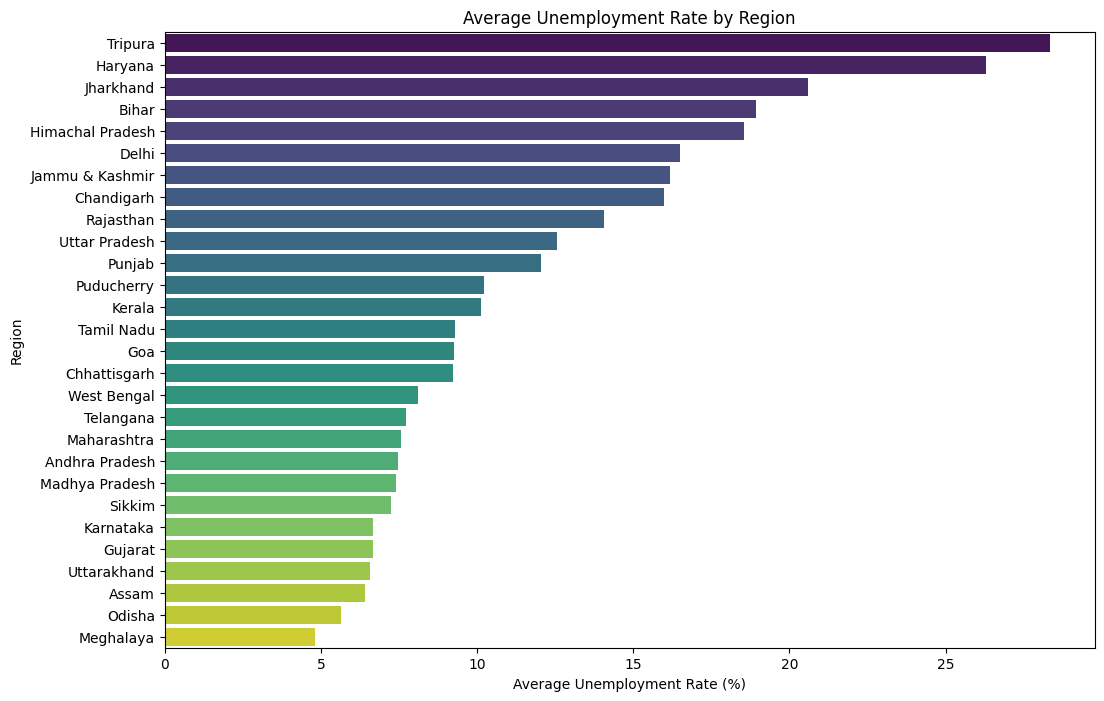

In [50]:
# Calculate the average unemployment rate for each region
avg_unemployment_rate = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Sort the data by average unemployment rate in descending order
avg_unemployment_rate = avg_unemployment_rate.sort_values(' Estimated Unemployment Rate (%)', ascending=False)

# Create a bar plot of the average unemployment rate by region
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_unemployment_rate, x=' Estimated Unemployment Rate (%)', y='Region', palette='viridis')
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("Region")
plt.title("Average Unemployment Rate by Region")

plt.show()